# ECG analysis based on PCA and Support Vector Machines

## Parte I: Entendiendo el Árticulo y Preprocesando Datos

En este artículo se propone la detección de arritmia cardiaca mediante el análisis de señales de electrocardiograma (ECG). para esto se hace uso de la base de datos ECGdata MIT-BIH.

El objetivo es desarrollar un algoritmo para reconocer y clasificar el latido normal (N), el latido del bloqueo de rama izquierda(L), el latido del bloque de rama derecha(R) y la contracción ventricular prematura (V). Se tomaron mas de 6000 señales, cada señal representando un latido completo. Se extraen las principales características usando PCA

La base de datos MIT-BIH Arrhythmia Database es un conjunto de 48 pares de archivos en donde el primer archivo contiene las señales 'MLII' y 'V1' generados por el ECG, y el segundo archivo contiene las señales mas altas clasificadas (N, L, R, V, etc) por expertos en enfermedades cardiovasculares. El primer archivo de cada par contiene aproximadamente 650 000 registros de las señales del ECG leídas durante aproximadamente 30 minutos. Y el segundo contiene aproximadamente 2500 registros.

Con cada uno de los picos etiquetados se construyó una pulsación cardiaca construyendo arreglos de 250 valores en línea siendo el pico etiquetado el 100-ésimo dato en este arreglo.

PCA es una técnica empleada para reducir la dimensionalidad de datasets complejos. dadas $N$ observaciones de $M$ variables la meta de PCA es encontrar $R$ nuevas variables siento $R < M$. 

SVM es una técnica de ML par ala clasificación o regresión de nuevas instancias. Se asume que se tiene un Dataset con ejemplares etiquetados y se desea determinar el numero $∞$ de clasificadores lineales que separan estos datos. La idea es encontrar líneas o hiperplanos que separen de la mejor manera a los diferentes conjuntos de datos formados.

Finalmente se obtienen resultados de predicción entre 96.1 % y 99.17 % mediante el uso de diferentes algoritmos de Machine Learning.

A continución se presente una réplica adapatada de la extracción de los datos y el arreglo con los datos etiquetados con la clase de pulso cardiaco y el archivo de donde se obtuvo el pulso.

Por: Anderson Jiménez, José Miguel Henao

In [208]:
import pandas as pd
import numpy as np

Creamos una función que nos convierta de txt a DataFrame con los datos necesarios

In [209]:
# n = Número de archivo a convertir
def get_txt(n):
    label_accepted = ['N','L','R','V']
    data = pd.read_csv(f"datasets/mitbih_database/{n}annotations.txt", delim_whitespace = True, engine='python', usecols = ['Sample','#']) 
    return data[data['#'].isin(label_accepted)]

Creamos una función que nos convierta de csv a DataFrame con los datos necesarios

In [210]:
# n = Número de archivo a convertir
def get_csv(n):
    data =  pd.read_csv(f'datasets/mitbih_database/{n}.csv', usecols = ["'sample #'","'MLII'"])
    data.rename(columns = {"'sample #'":'Sample'})
    #print(data)
    return data

Creamos una lista con los nombres de los archivos

In [211]:
file_numbers = [100,101,102,103,104,105,106,107,108,109,111,112,
                113,114,115,116,117,118,119,121,122,123,124,200,
                201,202,203,205,207,208,209,210,212,213,214,215,
                217,219,220,221,222,223,228,230,231,232,233,234,
               ]

In [212]:
d = get_csv(100)
d["'sample #'"].values[-1]

649999

Creamos una función que nos obtenga las pulsaciones completas desde peak-99 y peak+150. peak es cada pico etiquetado en labels

In [213]:
def get_pulse(dataframe, peak):
    pulse = None
    if peak >= 99 and (peak + 151) <= dataframe["'sample #'"].values[-1]:
        d = dataframe["'MLII'"].values
        pulse = d[peak-99:peak+151]
    return pulse

#### Mapeamos cada una de las etiquetas a valores numéricos

In [214]:
labels_dict = {
    'N': 1,
    'L': 2,
    'R': 3,
    'V': 4,
}

Tomamos cada uno de los picos etiquetados de los archivos de etiquetas txt y generamos un pulso basado en este pico etiquetado con 250 pulsaciones del electrocardiograma que estan en los archivos csv; cada pulso es convertido en un vector de dimensión = 1 X 250 y se le agrega la etiqueta (1:'N',2:'L',3:'R' o 4:'V') y el número del archivo de donde se tomó el pulso

In [215]:
%%time
data = []
for i in file_numbers:
    labels_txt = get_txt(i)
    data_csv = get_csv(i)
    for p in labels_txt['Sample'].values:
        pulse = get_pulse(data_csv, p)
        if pulse is not None:
            label = labels_dict[labels_txt['#'][labels_txt['Sample']==p].values[0]]
            pulse = np.append(pulse, label)
            pulse = np.append(pulse, i)
            data.append(pulse)

CPU times: user 1min, sys: 2.29 s, total: 1min 3s
Wall time: 1min 3s


#### Creamos los nombres de las columnas y cargamos los datos en un DataFrame
- C1 ... C250 : cada dato del pulso
- 'Type': etiqueta del pulso
- 'Archivo': número del archivo de donde se tomó el pulso 

In [216]:
%%time
columns = [f'C{i}' for i in range(250)]
columns.append('Type')
columns.append('File')
dataframe = pd.DataFrame(data = data, columns = columns)
dataframe.shape

CPU times: user 14.4 s, sys: 1.04 s, total: 15.4 s
Wall time: 15.7 s


(97476, 252)

In [217]:
dataframe.head(10)

C0   C1   C2   C3   C4   C5   C6   C7   C8   C9  ...  C242  C243  C244  \
0  964  963  962  960  958  959  961  962  963  963  ...   963   961   961   
1  955  955  958  958  957  955  954  954  956  958  ...   960   960   959   
2  955  955  956  953  951  952  953  953  953  949  ...   961   962   961   
3  954  954  956  956  955  955  948  952  952  955  ...   964   964   961   
4  961  961  958  958  957  957  958  958  958  956  ...   966   965   963   
5  962  960  958  958  957  958  958  960  960  958  ...   967   967   965   
6  950  951  952  953  952  952  954  956  955  955  ...   961   960   959   
7  953  951  952  955  955  954  952  952  954  953  ...   965   964   966   
8  959  959  957  956  956  960  961  960  957  957  ...   968   965   968   
9  959  960  960  962  963  960  960  960  962  963  ...   968   967   969   

   C245  C246  C247  C248  C249  Type  File  
0   962   965   966   963   962     1   100  
1   954   954   956   957   958     1   100  
2   965   964   962   958   956     1   100  
3   959   957   959   961   960     1   100  
4   965   965   967   966   964     1   100  
5   967   968   969   968   966     1   100  
6   959   959   962   962   961     1   100  
7   967   963   962   964   965     1   100  
8   970   970   969   967   964     1   100  
9   966   968   966   968   967     1   100  

[10 rows x 252 columns]

#### Conteo de las etiquetas o tipos de pulsos

In [218]:
dataframe['Type'].value_counts()

1    75020
2     8072
3     7255
4     7129
Name: Type, dtype: int64

#### Tomamos un ejemplo de cada uno de los pulsos

In [253]:
pulso_N = dataframe[dataframe['Type'] == 1].iloc[100][:250]
pulso_N
pulso_L = dataframe[dataframe['Type'] == 2].iloc[100][:250]
pulso_L
pulso_R = dataframe[dataframe['Type'] == 3].iloc[100][:250]
pulso_R
pulso_V = dataframe[dataframe['Type'] == 4].iloc[100][:250]
pulso_V
x = np.linspace(0,360,250)

#### Mostramos la grafíca de los pulsos de ejemplo

Text(0.5, 1.0, 'Ventricular')

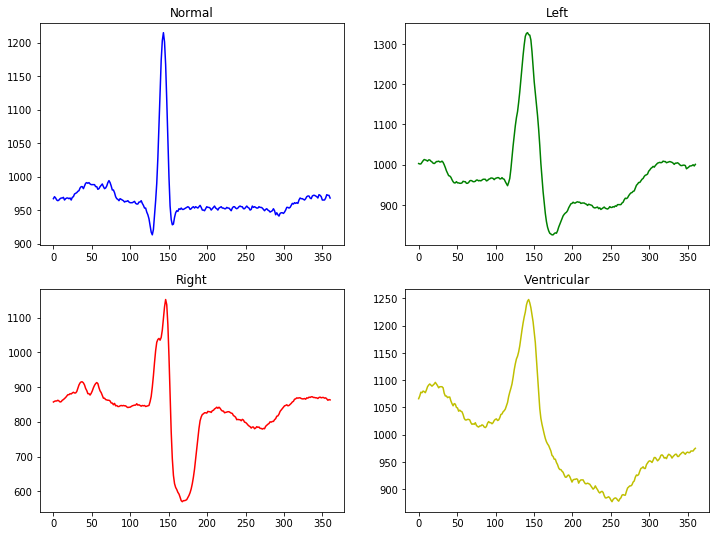

In [256]:
fig, axs = plt.subplots(2, 2, figsize = (12,9))
axs[0][0].plot(x, pulso_N, 'b')
axs[0][0].set_title('Normal')
axs[0][1].plot(x, pulso_L, 'g')
axs[0][1].set_title('Left')
axs[1][0].plot(x, pulso_R, 'r')
axs[1][0].set_title('Right')
axs[1][1].plot(x, pulso_V, 'y')
axs[1][1].set_title('Ventricular')

-----

## Parte II :  Creando Algorítmos de Aprendizaje

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [259]:
%%time
model_tree = DecisionTreeClassifier()
model_tree.fit(dataframe.drop(['Type','File'], axis = 1),dataframe['Type'])

CPU times: user 34.7 s, sys: 531 ms, total: 35.2 s
Wall time: 36.8 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [260]:
model_tree.predict([pulso_N]), model_tree.predict([pulso_L]), model_tree.predict([pulso_R]), model_tree.predict([pulso_V])

(array([1]), array([2]), array([3]), array([4]))

In [261]:
%%time
model_knn = KNeighborsClassifier(5)
model_knn.fit(dataframe.drop(['Type','File'], axis = 1),dataframe['Type'])

CPU times: user 2.05 s, sys: 200 ms, total: 2.25 s
Wall time: 2.34 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [262]:
model_knn.predict([pulso_N]), model_knn.predict([pulso_L]), model_knn.predict([pulso_R]), model_knn.predict([pulso_V]), 

(array([1]), array([2]), array([3]), array([4]))